# ACNS: Chapter 3 Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt

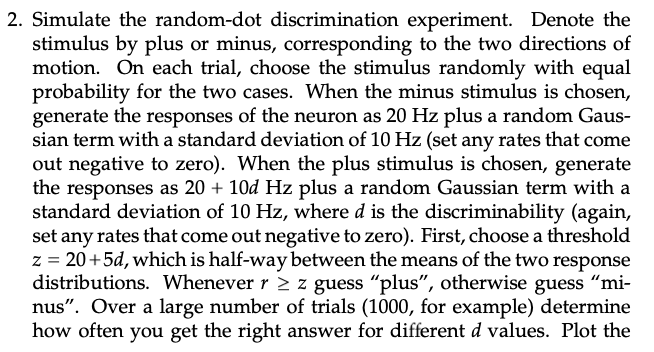



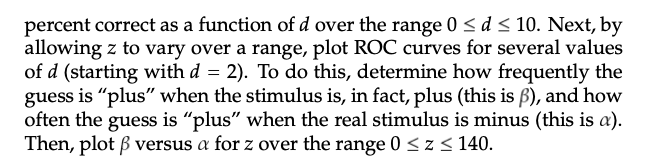

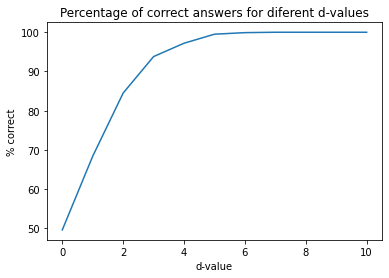

In [2]:
# Creating the stimulus
dim = 1000 # Trials
s = np.random.randint(0,2,size=(dim)) *2 -1 
r = []
guess = []
ds = np.array(np.linspace(0,10,11)) # discriminability rate
z = 20 + 5*ds # threshold
# Response for positive and negative stimulus
k=0
for d in ds:
  r.append([])
  for i in range(0, dim):
    if (s[i] < 0):
      num = np.random.normal(20, 10)
    else:
      num = np.random.normal(20+10*d, 10) 
    if (num < 0):
      num = 0 
    r[k].append(num)
  k+=1

# Setting the threshold 
for i in range(0,len(ds)):
  guess.append([])
  for j in range(0,dim):
    if ( (r[i][j]) >= z[i]):
      guess[i].append(1)
    else: 
      guess[i].append(-1) 


# How often good answer for different d values  
correct=[]
for i in range(0,len(ds)):
  index=0
  correct.append([])
  for j in range(0,dim):
    if (guess[i][j] == s[j]):
      index+=1
  correct[i]=index/10 # Percentage
#print(correct)

plt.plot(ds,correct)
plt.xlabel('d-value')
plt.ylabel('% correct')
plt.title('Percentage of correct answers for diferent d-values')
plt.show()

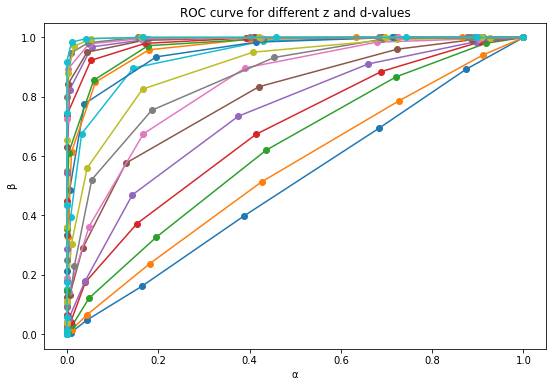

In [3]:
# First I fix d, I vary z, and another outside loop varying d 
# Now z varies over a range, for different values of d
dim = 1000 #stimulus dimension
nds = 20  #Number of ds and zs
np.random.seed(5)
s = np.random.randint(0,2,size=(dim)) *2 -1 
ds = np.array(np.linspace(0,4.5,nds)) #discriminability rate
zs = np.array(np.linspace(0,140,nds)) #threshold


plt.figure(figsize=(9,6))
for d in ds: 
  guess = []
  alpha = []
  beta = []
  r = []
  for i in range(0, nds) :
    aux = []
    for j in range(0,dim):
      if (s[j] < 0):
        num = np.random.normal(20, 10) 
      else:
        num = np.random.normal(20+10*d, 10) 
      if (num < 0):
        num = 0 
      aux.append(num)
    r.append(aux)
    

  # Setting the threshold 

  for z in zs:
    aux = []
    for j in range(0,dim):
      if ( (r[i][j]) >= z):
        aux.append(1)
      else: 
        aux.append(-1) 
    guess.append(aux)

  for i in range(0,nds):
    indexbeta=0
    indexalpha=0
    for j in range(0,dim):
      if ( (guess[i][j] == s[j]) and (s[j] > 0)) :
        indexbeta+=1
      if ( (guess[i][j] == -s[j]) and (guess[i][j] > 0)) :
        indexalpha+=1 

    alpha.append(indexalpha)
    beta.append(indexbeta)

  # Computing α and β

  # To do this, determine how frequently the
  # guess is "plus" when the stimulus is, in fact, plus (this is B), and how often the guess is "plus" when the real stimulus is minus (this is a).
  # Then, plot beta versus alpha for z over the range 0 ≤ z ≤ 140

  plt.plot(alpha/np.max(alpha), beta/np.max(beta),'-o')
  #plt.plot(alpha/np.max(alpha), beta/np.max(beta),'-o', label='d = {0}'. format(d))
  #plt.legend()
  
  


plt.xlabel('α')
plt.ylabel('β')
plt.title("ROC curve for different z and d-values")

plt.show()



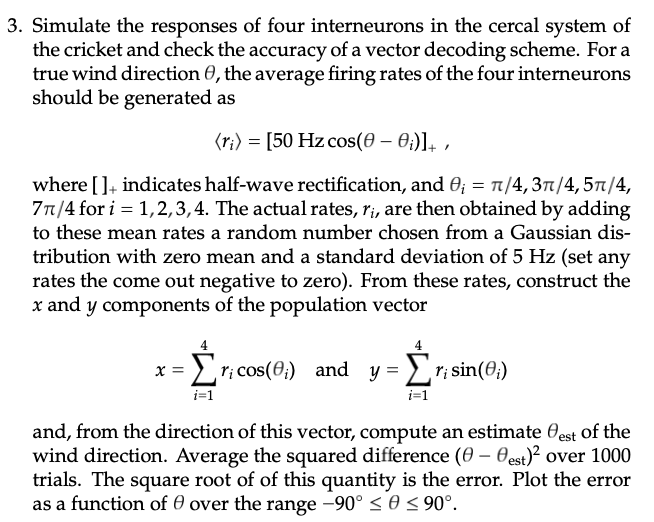

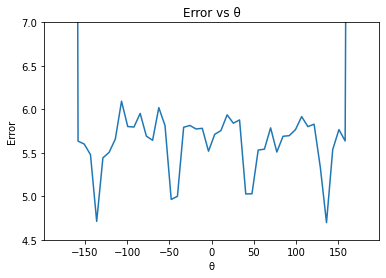

In [46]:
# Defining variables
theta = np.array(np.linspace(-np.pi/1,np.pi/1,50))
thetai = np.pi/4*np.array((1,3,5,7)) # 4 interneurons
N = 1000 # Number of trials
avgr=[]
thetaest = 0
sqrtError=[]
avgsq = 0
      
for i in range(0,len(theta)):
  avgsq = 0
  for n in range (0,N): 
    x = 0
    y = 0
    for j in range(0,4):   
      r = (50) * np.cos(theta[(i)] - thetai[j]) + np.random.normal(0, 5)
      if r<0: r=0
      x += r*np.cos(thetai[j])
      y += r*np.sin(thetai[j])
    thetaest=(np.arctan2(y,x)) # Theta estimate of the wind direction 
    avgsq += (theta[(i)] - thetaest)**2
  sqrtError.append(np.sqrt(avgsq/N)*180/np.pi)

plt.plot(theta*180/np.pi, sqrtError)
plt.xlabel('θ')
plt.ylabel('Error')
plt.title('Error vs θ')
plt.ylim([4.5, 7])

plt.show()


Each of the peaks correspond to one of the angles that the cercal system of the cricket codifies for. In this case, the system is compound by 4 neurons. 

This means that the error is minimum for those angles, and that it is increasing for an angle that differs from those. This is because more than one neuron will fire when that stimuli, making harder de decodification. 

If we plot just from [-90,90] with a higher number of trials to make it clearer, we will get the following graph:



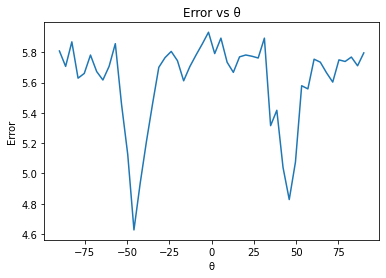

In [40]:
# Defining variables
theta = np.array(np.linspace(-np.pi/2,np.pi/2,50))
thetai = np.pi/4*np.array((1,3,5,7)) # 4 interneurons
N = 2000 # Number of trials
avgr=[]
thetaest = 0
sqrtError=[]
avgsq = 0
      
for i in range(0,len(theta)):
  avgsq = 0
  for n in range (0,N): 
    x = 0
    y = 0
    for j in range(0,4):   
      r = (50) * np.cos(theta[(i)] - thetai[j]) + np.random.normal(0, 5)
      if r<0: r=0
      x += r*np.cos(thetai[j])
      y += r*np.sin(thetai[j])
    thetaest=(np.arctan2(y,x)) # Theta estimate of the wind direction 
    avgsq += (theta[(i)] - thetaest)**2
  sqrtError.append(np.sqrt(avgsq/N)*180/np.pi)

plt.plot(theta*180/np.pi, sqrtError)
plt.xlabel('θ')
plt.ylabel('Error')
plt.title('Error vs θ')


plt.show()